In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

In [8]:
#Load the cleaned data that we used in the previous model

df = pd.read_csv('/Users/amitmishra/Downloads/Datasets/credit-risk/cr_loan_w2.csv')

In [9]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,21,9600,5,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
1,25,9600,1,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
2,23,65500,4,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
3,24,54400,8,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
4,21,9900,2,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


### Prepping data for modelling

In [13]:
X = df.drop(columns=['loan_status'], axis = 1)
y = df['loan_status']

In [14]:
#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
clf_xgb = xgb.XGBClassifier()

In [25]:
model_xgb = clf_xgb.fit(X_train, np.ravel(y_train))

In [26]:
#Predict the probabilities of default

xgb_preds_prob = model_xgb.predict_proba(X_test)

In [35]:
#Get the loan_status predictions. 1 = default, 0 = non-default

xgb_y_pred = model_xgb.predict(X_test)

In [34]:
#Getting the order for the target_names

np.unique(y_train)

array([0, 1])

In [32]:
target_names = ['Non-Default', 'default']
print(classification_report(y_test, xgb_y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      6868
     default       0.96      0.74      0.84      1970

    accuracy                           0.94      8838
   macro avg       0.95      0.86      0.90      8838
weighted avg       0.94      0.94      0.93      8838



In [36]:
#Default model has a default recall of 0.74. Even the  based model has a better performance than the logistic regression model

In [37]:
#Get the important features using get_booster()

model_xgb.get_booster().get_score(importance_type= 'weight')

{'person_age': 296.0,
 'person_income': 758.0,
 'person_emp_length': 312.0,
 'loan_amnt': 348.0,
 'loan_int_rate': 545.0,
 'loan_percent_income': 315.0,
 'cb_person_cred_hist_length': 193.0,
 'person_home_ownership_MORTGAGE': 48.0,
 'person_home_ownership_OTHER': 5.0,
 'person_home_ownership_OWN': 52.0,
 'person_home_ownership_RENT': 83.0,
 'loan_intent_DEBTCONSOLIDATION': 56.0,
 'loan_intent_EDUCATION': 29.0,
 'loan_intent_HOMEIMPROVEMENT': 48.0,
 'loan_intent_MEDICAL': 72.0,
 'loan_intent_PERSONAL': 39.0,
 'loan_intent_VENTURE': 35.0,
 'loan_grade_A': 3.0,
 'loan_grade_B': 28.0,
 'loan_grade_C': 54.0,
 'loan_grade_D': 51.0,
 'loan_grade_E': 24.0,
 'loan_grade_F': 8.0,
 'loan_grade_G': 18.0,
 'cb_person_default_on_file_N': 31.0}

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

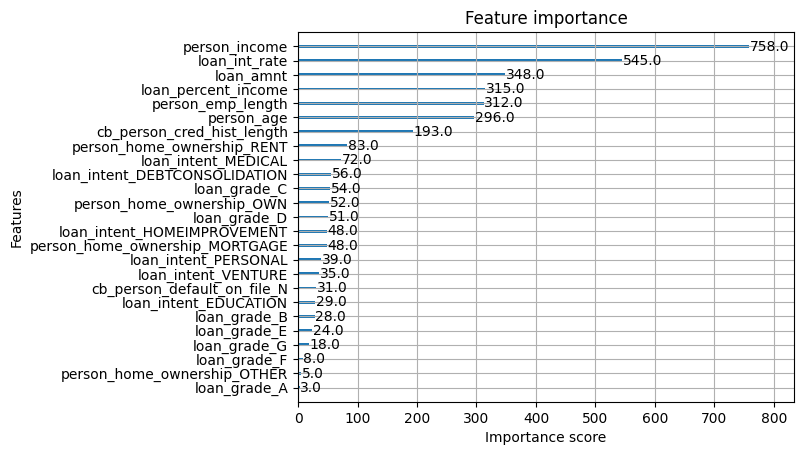

In [38]:
xgb.plot_importance(model_xgb, importance_type= 'weight')

In [ ]:
#Model used 800 trees and person_income was used across 758 of them

In [41]:
print(f"Accuracy score of base model is: {accuracy_score(y_test, xgb_y_pred)}")

Accuracy score of base model is: 0.9353926227653315
